<a href="https://colab.research.google.com/github/itsmeeeeeee/Coreference-Resolution/blob/main/Neurocoref_Aldi_Halili.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!git clone https://github.com/huggingface/neuralcoref.git

%cd neuralcoref

!pip install -r requirements.txt
!pip install -e .

Mounted at /content/drive
Cloning into 'neuralcoref'...
remote: Enumerating objects: 772, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 772 (delta 10), reused 16 (delta 7), pack-reused 748
Receiving objects: 100% (772/772), 67.85 MiB | 22.71 MiB/s, done.
Resolving deltas: 100% (407/407), done.
/content/neuralcoref
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.6
    Uninstalling srsly-2.4.6:
      Successfully u

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
import neuralcoref

100%|██████████| 40155833/40155833 [00:02<00:00, 17116452.32B/s]


In [ ]:
!python -m spacy download en

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 53.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047102 sha256=4ad5af146ef1c29428dfeacb546d29d3cad1715d82c2d9da3f586ff5729ad36f
  Stored in directory: /root/.cache/pip/wheels/19/d6/1c/5484b95647df5d7afaf74abde458c66c1cd427e69e801fe826
Successfully built en_core_web_sm
  Attempting uninstall: en_core_web_sm
    Found existing installation: en-core-web-sm 3.5.0
    Uninstalling en-core-web-sm-3.5.0:
      Successfully uninstalled en-core-web-sm-3.5.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.9/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.9/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
nlp = spacy.load('en')
neuralcoref.add_to_pipe(nlp)

In [ ]:
def create_listoftupel(predicted_output): 
  """ Diese Funktion gibt eine Liste aus Tupeln mit den Korefentpaare aus """
  listofpaaren=list()
  for el in predicted_output:
    
    for e in el:
      #print(str(e[0]),str(e[1]))
      listofpaaren.append((str(e[0]),str(e[0])))
      listofpaaren.append((str(e[0]),str(e[1])))
  return listofpaaren



def calculate_precision_recall_f_score(predicted, golden_standard):
   
    """ Diese Funktion berechnet die Precision, den Recall und den F-Score gegeben 
        die Liste der vorhergesagten Paare und goldenen Standardpaaren von Entitäten.
    """
    # Berechnung der true positives
    tp = 0
    for pair in predicted:
        if pair in golden_standard:
            tp += 1
    
    # Berechnung der Precision and des recalls
    precision = tp / len(predicted)
    recall = tp / len(golden_standard)
    
    #Berechnung des F-Scores
    f_score=2* (precision * recall) / (precision + recall)
    return precision, recall, f_score

Folgende Phänomene werden getestet.

###Anaphora mit Pronommn

In [ ]:
#Anaphora mit Pronomen
sentence1 = nlp('My sister has a friend. she loves him.')
sentence2 = nlp('My brother has a new girlfriend.She is a student.')
sentence3 = nlp("i saw a man with a telescope. He was a doctor")
sentence4 = nlp("John has always loved learning. He is a good student")
sentence5 = nlp("The task is simply too difficult.I should have known it")
sentence6 = nlp("the music stopped, and that upset everyone.") #the musik stopped is Antezedent, The demonstrative pronoun that is an Anapher
sentence7 = nlp("Susan dropped the plate. It shattered loudly.")
sentence8 = nlp("The music was so loud that it couldn't be enjoyed.")
sentence9 = nlp("The book was too heavy for her, so she put it down.")
sentence10 = nlp("The concert was amazing. I'll never forget it")

sent=sentence1._.coref_clusters
print("sentence1: ", sentence1._.coref_clusters)
print("sentence1: ", sentence1._.has_coref)

print("sentence2: ", sentence2._.coref_clusters)
print("sentence2: ", sentence2._.has_coref)

print("sentence3: ", sentence3._.coref_clusters)
print("sentence3: ", sentence3._.has_coref)

print("sentence4: ", sentence4._.coref_clusters)
print("sentence4: ", sentence4._.has_coref)

print("sentence5: ", sentence5._.coref_clusters)
print("sentence5: ", sentence5._.has_coref)

print("sentence6: ", sentence6._.coref_clusters)
print("sentence6: ", sentence6._.has_coref)

print("sentence7: ", sentence7._.coref_clusters)
print("sentence7: ", sentence7._.has_coref)

print("sentence8: ", sentence8._.coref_clusters)
print("sentence8: ", sentence8._.has_coref)

print("sentence9: ", sentence9._.coref_clusters)
print("sentence9: ", sentence9._.has_coref)

print("sentence10: ", sentence10._.coref_clusters)
print("sentence10: ", sentence10._.has_coref)


sentence1:  [My sister: [My sister, she], a friend: [a friend, him]]
sentence1:  True
sentence2:  [My brother: [My brother, She]]
sentence2:  True
sentence3:  [a man: [a man, He]]
sentence3:  True
sentence4:  [John: [John, He]]
sentence4:  True
sentence5:  [The task: [The task, it]]
sentence5:  True
sentence6:  []
sentence6:  False
sentence7:  [the plate: [the plate, It]]
sentence7:  True
sentence8:  [The music: [The music, it]]
sentence8:  True
sentence9:  [The book: [The book, it], her: [her, she]]
sentence9:  True
sentence10:  [The concert: [The concert, it]]
sentence10:  True


In [ ]:
outputof10sente=[sentence1._.coref_clusters,sentence2._.coref_clusters,sentence3._.coref_clusters,sentence4._.coref_clusters,sentence5._.coref_clusters,sentence6._.coref_clusters,sentence7._.coref_clusters,sentence8._.coref_clusters,sentence9._.coref_clusters,sentence10._.coref_clusters]

predicted_pairs_anaphora=create_listoftupel(outputof10sente)

goldenstandart_anaphora=[("My sister", "My sister"),("My sister", "she"),("a friend", "a friend"),("a friend", "him"),
                ("My brother", "My brother"),("a new girlfriend", "a new girlfriend"), ("a new girlfriend", "She"),
                ("a man", "a man"),("a men","He"),
                ("John", "John"),("John", "He"),
                ("The task", "The task"),("The task", "it"),
                ("the music", "the music"),("the music", "that"),
                ("the plate", "the plate"),("the plate", "It"),
                ("The music", "The music"), ("The music", "it"),
                ('The book', 'The book'), ('The book', 'it'), ('her', 'her'), ('her', 'she'), 
                ('The concert', 'The concert'), ('The concert', 'it')]

print(predicted_pairs_anaphora)


[('My sister', 'My sister'), ('My sister', 'she'), ('a friend', 'a friend'), ('a friend', 'him'), ('My brother', 'My brother'), ('My brother', 'She'), ('a man', 'a man'), ('a man', 'He'), ('John', 'John'), ('John', 'He'), ('The task', 'The task'), ('The task', 'it'), ('the plate', 'the plate'), ('the plate', 'It'), ('The music', 'The music'), ('The music', 'it'), ('The book', 'The book'), ('The book', 'it'), ('her', 'her'), ('her', 'she'), ('The concert', 'The concert'), ('The concert', 'it')]


In [ ]:
precision,recall,f_score=calculate_precision_recall_f_score(predicted_pairs_anaphora,goldenstandart_anaphora)

In [ ]:
print("Anaphora Ergebnisse: ")
print("")
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-score: {:.2f}".format(f_score))
   

Anaphora Ergebnisse: 

Precision: 0.91
Recall: 0.80
F-score: 0.85


###Kataphora

In [ ]:
# Kataphora
sentence1 = nlp("because he is a good student, John has always loved learning")
sentence2 = nlp("A few weeks before he died, my father gave me an old cigar box filled with faded letters.") 
sentence3 = nlp("After he had received his orders, the soldier left the barracks.")
sentence4 = nlp("because she has a telescope, the woman is a doctor")
sentence5 = nlp("If you want them, there are cookies in the kitchen.") 
sentence6 = nlp("If you want some, here's some parmesan cheese.")
sentence7 = nlp("In their free time, the boys play video games") 
sentence8 = nlp("Despite her difficulty, Wilma came to understand the point.")
sentence9 = nlp("If he wants to win the race, the runner needs to train harder")
sentence10 = nlp("Before she left for the party, the woman put on the dress she had bought last week.")


print("sentence1: ", sentence1._.coref_clusters)
print("sentence1: ", sentence1._.has_coref)
print("sentence2: ", sentence2._.coref_clusters)
print("sentence2: ", sentence2._.has_coref)
print("sentence3: ", sentence3._.coref_clusters)
print("sentence3: ", sentence3._.has_coref)
print("sentence4: ", sentence4._.coref_clusters)
print("sentence4: ", sentence4._.has_coref)
print("sentence5: ", sentence5._.coref_clusters)
print("sentence5: ", sentence5._.has_coref)
print("sentence6: ", sentence6._.coref_clusters)
print("sentence6: ", sentence6._.has_coref)
print("sentence7: ", sentence7._.coref_clusters)
print("sentence7: ", sentence7._.has_coref)
print("sentence8: ", sentence8._.coref_clusters)
print("sentence8: ", sentence8._.has_coref)
print("sentence9: ", sentence9._.coref_clusters)
print("sentence9: ", sentence9._.has_coref)
print("sentence10: ", sentence10._.coref_clusters)
print("sentence10: ", sentence10._.has_coref)


sentence1:  [John: [he, John]]
sentence1:  True
sentence2:  []
sentence2:  False
sentence3:  [he: [he, his]]
sentence3:  True
sentence4:  [the woman: [she, the woman]]
sentence4:  True
sentence5:  []
sentence5:  False
sentence6:  []
sentence6:  False
sentence7:  []
sentence7:  False
sentence8:  [Wilma: [her, Wilma]]
sentence8:  True
sentence9:  []
sentence9:  False
sentence10:  [the woman: [she, the woman, she]]
sentence10:  True


In [ ]:
outputof10sente=[sentence1._.coref_clusters,sentence2._.coref_clusters,sentence3._.coref_clusters,sentence4._.coref_clusters,sentence5._.coref_clusters,sentence6._.coref_clusters,sentence7._.coref_clusters,sentence8._.coref_clusters,sentence9._.coref_clusters,sentence10._.coref_clusters]

predicted_pairs_kataphora=create_listoftupel(outputof10sente)

goldenstandart_kataphora=[('he', 'he'), ('he', 'John'),
                               ('he', 'he'), ('he', 'my father'),
                               ("he", "he"),("he", "the soldier"),
                               ('she', 'she'), ('she', 'the woman'),
                               ("them","them"),("them","cookies"),
                               ("some","some"),("some","cheese"),
                               ("thier","their"),("their","the boys"),
                               ('her', 'her'), ('her', 'Wilma'),
                               ('he', 'he'), ('he', 'the runner'), 
                               ('she', 'she'), ('she', 'the woman')]


print(predicted_pairs_kataphora)

[('he', 'he'), ('he', 'John'), ('he', 'he'), ('he', 'his'), ('she', 'she'), ('she', 'the woman'), ('her', 'her'), ('her', 'Wilma'), ('she', 'she'), ('she', 'the woman')]


In [ ]:
precision,recall,f_score=calculate_precision_recall_f_score(predicted_pairs_kataphora,goldenstandart_kataphora)

In [ ]:
print("Kataphora Ergebnisse:" )
print("")
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-score: {:.2f}".format(f_score))

Kataphora Ergebnisse:

Precision: 0.90
Recall: 0.45
F-score: 0.60


###Gebundene Variablen (bound anaphors)



In [ ]:
#Gebundene Variablen (bound anaphors)
	
sentence1 = nlp("Every student has received his grade.")
sentence2 = nlp("No student was upset with his grade")
sentence3 = nlp("The dancer hurt herself")
sentence4 = nlp("Every dancer brought her left arm forward.") 
sentence5 = nlp("every european country is dealing with financial problems due to inflation in its way")
sentence6 = nlp("Most computational linguists prefer their own parsers")
sentence7 = nlp("The child wondered to themselves what they wanted to be when they grew up.")
sentence8 = nlp("The students challenged themselves to finish the project by the end of the week.")
sentence9 = nlp("The driver hit the curb and damaged the car itself.")
sentence10 = nlp("One should always do their best.")


print("sentence1: ", sentence1._.coref_clusters)
print("sentence1: ", sentence1._.has_coref)
print("sentence2: ", sentence2._.coref_clusters)
print("sentence2: ", sentence2._.has_coref)
print("sentence3: ", sentence3._.coref_clusters)
print("sentence3: ", sentence3._.has_coref)
print("sentence4: ", sentence4._.coref_clusters)
print("sentence4: ", sentence4._.has_coref)
print("sentence5: ", sentence5._.coref_clusters)
print("sentence5: ", sentence5._.has_coref)
print("sentence6: ", sentence6._.coref_clusters)
print("sentence6: ", sentence6._.has_coref)
print("sentence7: ", sentence7._.coref_clusters)
print("sentence7: ", sentence7._.has_coref)
print("sentence8: ", sentence8._.coref_clusters)
print("sentence8: ", sentence8._.has_coref)
print("sentence9: ", sentence9._.coref_clusters)
print("sentence9: ", sentence9._.has_coref)
print("sentence10: ", sentence10._.coref_clusters)
print("sentence10: ", sentence10._.has_coref)



sentence1:  [Every student: [Every student, his]]
sentence1:  True
sentence2:  [No student: [No student, his]]
sentence2:  True
sentence3:  [The dancer: [The dancer, herself]]
sentence3:  True
sentence4:  [Every dancer: [Every dancer, her]]
sentence4:  True
sentence5:  [every european country: [every european country, its]]
sentence5:  True
sentence6:  [Most computational linguists: [Most computational linguists, their]]
sentence6:  True
sentence7:  [themselves: [themselves, they, they]]
sentence7:  True
sentence8:  [The students: [The students, themselves]]
sentence8:  True
sentence9:  []
sentence9:  False
sentence10:  [One: [One, their]]
sentence10:  True


In [ ]:
outputof10sente=[sentence1._.coref_clusters,sentence2._.coref_clusters,sentence3._.coref_clusters,sentence4._.coref_clusters,sentence5._.coref_clusters,sentence6._.coref_clusters,sentence7._.coref_clusters,sentence8._.coref_clusters,sentence9._.coref_clusters,sentence10._.coref_clusters]
predicted_pairs_bound_anaphor=create_listoftupel(outputof10sente)

goldenstandart_bound_anaphor=[('Every student', 'Every student'), ('Every student', 'his'), 
			          ('No student', 'No student'), ('No student', 'his'), 
		          	('The dancer', 'The dancer'), ('The dancer', 'herself'), 
		          	('Every dancer', 'Every dancer'), ('Every dancer', 'her'), 
		          	('every european country', 'every european country'), ('every european country', 'its'),
		          	('Most computational linguists', 'Most computational linguists'), ('Most computational linguists', 'their'), 
		          	('The child', 'The child'), ('The child', 'themselfes'),
		          	('The students', 'The students'), ('The students', 'themselves'),
                ('The driver', 'The driver'), ('The driver', 'itself'),
                ('One', 'One'), ('One', 'their')]

print(predicted_pairs_bound_anaphor)


[('Every student', 'Every student'), ('Every student', 'his'), ('No student', 'No student'), ('No student', 'his'), ('The dancer', 'The dancer'), ('The dancer', 'herself'), ('Every dancer', 'Every dancer'), ('Every dancer', 'her'), ('every european country', 'every european country'), ('every european country', 'its'), ('Most computational linguists', 'Most computational linguists'), ('Most computational linguists', 'their'), ('themselves', 'themselves'), ('themselves', 'they'), ('The students', 'The students'), ('The students', 'themselves'), ('One', 'One'), ('One', 'their')]


In [ ]:
precision,recall,f_score=calculate_precision_recall_f_score(predicted_pairs_bound_anaphor,goldenstandart_bound_anaphor)

In [ ]:
print("Gebundene Variablen Ergebnisse:" )
print("")

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-score: {:.2f}".format(f_score))

Gebundene Variablen Ergebnisse:

Precision: 0.89
Recall: 0.80
F-score: 0.84


###Koreferente Nominalphrasen

In [ ]:
#Koreferente Nominalphrasen

sentence1 = nlp("The project leader is refusing to help. The jerk thinks only of himself.")
sentence2 = nlp("Some of our colleagues are going to be supportive. These kinds of people will earn our gratitude")
sentence3 = nlp("The head doctor makes big visits at hospital. This physician doesn't know any patients")
sentence4 = nlp("The teacher is coming next monday. This professor is finally coming back")
sentence5 = nlp("The teacher is coming next monday. The professor is finally coming back")

print("sentence1: ", sentence1._.coref_clusters)
print("sentence1: ", sentence1._.has_coref)

print("sentence2: ", sentence2._.coref_clusters)
print("sentence2: ", sentence2._.has_coref)

print("sentence3: ", sentence3._.coref_clusters)
print("sentence3: ", sentence3._.has_coref)

print("sentence4: ", sentence4._.coref_clusters)
print("sentence4: ", sentence4._.has_coref)

print("sentence5: ", sentence5._.coref_clusters)
print("sentence5: ", sentence5._.has_coref)

sentence1:  [The jerk: [The jerk, himself]]
sentence1:  True
sentence2:  [our: [our, our]]
sentence2:  True
sentence3:  [The head doctor: [The head doctor, This physician]]
sentence3:  True
sentence4:  [The teacher: [The teacher, This professor]]
sentence4:  True
sentence5:  []
sentence5:  False


In [ ]:
outputof8sente=[sentence1._.coref_clusters,sentence2._.coref_clusters,sentence3._.coref_clusters,sentence4._.coref_clusters,sentence5._.coref_clusters]

predicted_pairs_koreferent_np=create_listoftupel(outputof8sente)

goldenstandart_koreferent_np= [("The project leader", "The project leader"),("The project leader", "The jerk"),
			            ("Some of our colleagues", "Some of our colleagues"),("Some of our colleagues", "These kinds of people"),
		            	("The head doctor", "The head doctor"),("The head doctor", "This physician"),
		            	("The teacher", "The teacher"),("The teacher", "This professor"),
		            	("The teacher", "The teacher"),("The teacher", "The professor")]


print(predicted_pairs_koreferent_np)

[('The jerk', 'The jerk'), ('The jerk', 'himself'), ('our', 'our'), ('our', 'our'), ('The head doctor', 'The head doctor'), ('The head doctor', 'This physician'), ('The teacher', 'The teacher'), ('The teacher', 'This professor')]


In [ ]:
precision,recall,f_score=calculate_precision_recall_f_score(predicted_pairs_koreferent_np,goldenstandart_koreferent_np)

In [ ]:
print("Ergebnisse der Koreferente Nominalphrasen: " )
print("")
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-score: {:.2f}".format(f_score))

Ergebnisse der Koreferente Nominalphrasen: 

Precision: 0.50
Recall: 0.40
F-score: 0.44


###Gebundene Antezedenzen

In [ ]:
# Gebundene Antezedenzen
sentence1 = nlp("Eva and John said they like fish, but he prefers sushi.") 
sentence2 = nlp("Alice and Bob said they like potatoes, but she prefers sushi.") 
sentence3 = nlp("Mary and Sam left the party. They arrived home together.")
sentence4 = nlp("Arthur and Jacky are the best team, i think they will win, but he is better.")  
sentence5 = nlp("James met Annie. He greeted her. They went to the movies.")

print("sentence1: ", sentence1._.coref_clusters)
print("sentence1: ", sentence1._.has_coref)

print("sentence2: ", sentence2._.coref_clusters)
print("sentence2: ", sentence2._.has_coref)

print("sentence3: ", sentence3._.coref_clusters)
print("sentence3: ", sentence3._.has_coref)

print("sentence4: ", sentence4._.coref_clusters)
print("sentence4: ", sentence4._.has_coref)

print("sentence5: ", sentence5._.coref_clusters)
print("sentence5: ", sentence5._.has_coref)


sentence1:  [Eva and John: [Eva and John, they], John: [John, he]]
sentence1:  True
sentence2:  [Alice: [Alice, she], Alice and Bob: [Alice and Bob, they]]
sentence2:  True
sentence3:  [Mary and Sam: [Mary and Sam, They]]
sentence3:  True
sentence4:  [Arthur and Jacky: [Arthur and Jacky, they, he]]
sentence4:  True
sentence5:  [James: [James, He], Annie: [Annie, her]]
sentence5:  True


In [ ]:
outputof8sente=[sentence1._.coref_clusters,sentence2._.coref_clusters,sentence3._.coref_clusters,sentence4._.coref_clusters,sentence5._.coref_clusters]

predicted_pairs_split_antecedent=create_listoftupel(outputof8sente)

goldenstandart_split_antecedent= [('Eva and John', 'Eva and John'), ('Eva and John', 'they'), ('John', 'John'), ('John', 'he'), 
									('Alice', 'Alice'), ('Alice', 'she'), ('Alice and Bob', 'Alice and Bob'), ('Alice and Bob', 'they'), 
									('Mary and Sam', 'Mary and Sam'), ('Mary and Sam', 'They'), 
									('Arthur and Jacky', 'Arthur and Jacky'), ('Arthur and Jacky', 'they'), ("Arthur", "Arthur"),("Arthur","he"),
									('James', 'James'), ('James', 'He'), ('Annie', 'Annie'), ('Annie', 'her'), ("James Annie", "James Annie"), ("James Annie", "they")]



print(predicted_pairs_split_antecedent)

[('Eva and John', 'Eva and John'), ('Eva and John', 'they'), ('John', 'John'), ('John', 'he'), ('Alice', 'Alice'), ('Alice', 'she'), ('Alice and Bob', 'Alice and Bob'), ('Alice and Bob', 'they'), ('Mary and Sam', 'Mary and Sam'), ('Mary and Sam', 'They'), ('Arthur and Jacky', 'Arthur and Jacky'), ('Arthur and Jacky', 'they'), ('James', 'James'), ('James', 'He'), ('Annie', 'Annie'), ('Annie', 'her')]


In [ ]:
precision,recall,f_score=calculate_precision_recall_f_score(predicted_pairs_split_antecedent,goldenstandart_split_antecedent)

In [ ]:
print("Gebundene Antezedenzen Ergebnisse:" )
print("")
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-score: {:.2f}".format(f_score))

Gebundene Antezedenzen Ergebnisse:

Precision: 1.00
Recall: 0.80
F-score: 0.89


###Non-Referring Expressions

####Apositiononen

In [ ]:
#Appositionen
sentence1 = nlp("John, my youngest brother, is a student")
sentence2 = nlp("United, a unit of UAL, matched the fares")
sentence3 = nlp("Victoria Chen, CFO of Megabucks Banking, saw ...")
sentence4 = nlp("my sister, a doctor whose name is Alice Smith")
sentence5 = nlp("My sister, Alice Smith, likes jelly beans.")

print("Alle Phänomene werden richitg erkannt und mit False klassifiziert.")
print("sentence1: ", sentence1._.coref_clusters)
print("sentence1: ", sentence1._.has_coref)

print("sentence2: ", sentence2._.coref_clusters)
print("sentence2: ", sentence2._.has_coref)

print("sentence3: ", sentence3._.coref_clusters)
print("sentence3: ", sentence3._.has_coref)

print("sentence4: ", sentence4._.coref_clusters)
print("sentence4: ", sentence4._.has_coref)

print("sentence5: ", sentence5._.coref_clusters)
print("sentence5: ", sentence5._.has_coref)

Alle Phänomene werden richitg erkannt und mit False klassifiziert.
sentence1:  []
sentence1:  False
sentence2:  []
sentence2:  False
sentence3:  []
sentence3:  False
sentence4:  []
sentence4:  False
sentence5:  []
sentence5:  False


####Prädikative Nominalphrasen

In [ ]:
# Prädikateve NPs
sentence1 = nlp("In United is a unit of UAL")
sentence2 = nlp("She was our friend")
sentence3 = nlp("That is an excuse")
sentence4 = nlp("Joe Biden is the President of the United State")

print("Alle Phänomene werden richitg erkannt und mit False klassifiziert.")
print("")
print("sentence1: ", sentence1._.coref_clusters)
print("sentence1: ", sentence1._.has_coref)

print("sentence2: ", sentence2._.coref_clusters)
print("sentence2: ", sentence2._.has_coref)

print("sentence3: ", sentence3._.coref_clusters)
print("sentence3: ", sentence3._.has_coref)

print("sentence4: ", sentence4._.coref_clusters)
print("sentence4: ", sentence4._.has_coref)

Alle Phänomene werden richitg erkannt und mit False klassifiziert.

sentence1:  []
sentence1:  False
sentence2:  []
sentence2:  False
sentence3:  []
sentence3:  False
sentence4:  []
sentence4:  False


####Generische Nominalphrasen

In [ ]:
# Generics
# Der erste Satz wurde falsch annotiert, die anderen wurden erkannt
sentence1 = nlp("I love mangos. They are very tasty")
sentence2 = nlp("In July in San Francisco you have to wear a jacket.")
sentence3 = nlp("You never count your money")
sentence4 = nlp ("Swimming is a good sport for physical fitness")

print("sentence1: ", sentence1._.coref_clusters)
print("sentence1: ", sentence1._.has_coref)

print("sentence2: ", sentence2._.coref_clusters)
print("sentence2: ", sentence2._.has_coref)

print("sentence3: ", sentence3._.coref_clusters)
print("sentence3: ", sentence3._.has_coref)

print("sentence4: ", sentence4._.coref_clusters)
print("sentence4: ", sentence4._.has_coref)

sentence1:  [mangos: [mangos, They]]
sentence1:  True
sentence2:  []
sentence2:  False
sentence3:  []
sentence3:  False
sentence4:  []
sentence4:  False


####Expletives

#####Clefts

In [ ]:
# Clefts
sentence1 = nlp("It was Emma Goldman who founded Mother Earth")
sentence2 = nlp("It was my sister who stole the cookies.")
sentence3 = nlp("It was the rain that caused the cancellation of the game.")
sentence4 = nlp ("It was the concert last night that I enjoyed the most.")

print("Clefts werden richtg erkannt:")
print("")

print("sentence1: ", sentence1._.coref_clusters)
print("sentence1: ", sentence1._.has_coref)

print("sentence2: ", sentence2._.coref_clusters)
print("sentence2: ", sentence2._.has_coref)

print("sentence3: ", sentence3._.coref_clusters)
print("sentence3: ", sentence3._.has_coref)

print("sentence4: ", sentence4._.coref_clusters)
print("sentence4: ", sentence4._.has_coref)

Clefts werden richtg erkannt:

sentence1:  []
sentence1:  False
sentence2:  []
sentence2:  False
sentence3:  []
sentence3:  False
sentence4:  []
sentence4:  False


#####Extraposition

In [ ]:
#Extrapositionen
sentence1 = nlp("It surprised me that there was a herring hanging on her wall.")
sentence2 = nlp("I believe that it will rain tomorrow. ")
sentence3 = nlp("It seems that the new restaurant is very popular. ")
sentence4 = nlp ("He suggested that we go to the park.")

print("Extrapositionen werden richtig erkannt:")
print("")
print("sentence1: ", sentence1._.coref_clusters)
print("sentence1: ", sentence1._.has_coref)

print("sentence2: ", sentence2._.coref_clusters)
print("sentence2: ", sentence2._.has_coref)

print("sentence3: ", sentence3._.coref_clusters)
print("sentence3: ", sentence3._.has_coref)

print("sentence4: ", sentence4._.coref_clusters)
print("sentence4: ", sentence4._.has_coref)

Extrapositionen werden richtig erkannt:

sentence1:  []
sentence1:  False
sentence2:  []
sentence2:  False
sentence3:  []
sentence3:  False
sentence4:  []
sentence4:  False


In [ ]:
#Pleonastic
sentence1 = nlp("it is raining outside")
sentence2 = nlp("hit it of")
sentence3 = nlp("It seems that you are right.")
sentence4 = nlp ("There are a lot of people here today.")

print("Pleonastic werden richtig erkannt:")
print("")
print("sentence1: ", sentence1._.coref_clusters)
print("sentence1: ", sentence1._.has_coref)

print("sentence2: ", sentence2._.coref_clusters)
print("sentence2: ", sentence2._.has_coref)

print("sentence3: ", sentence3._.coref_clusters)
print("sentence3: ", sentence3._.has_coref)

print("sentence4: ", sentence4._.coref_clusters)
print("sentence4: ", sentence4._.has_coref)

Pleonastic werden richtig erkannt:

sentence1:  []
sentence1:  False
sentence2:  []
sentence2:  False
sentence3:  []
sentence3:  False
sentence4:  []
sentence4:  False


In [ ]:
# Die lange Sätze funtkionieren teilweise nicht. bzw. werden vom System nicht richtig erkannt. 
# Satz eins funktioniert nicht gut, Satz zwei wird erkannt.

#Beispiele:
sentence1 = nlp("Victoria Chen, CFO of Megabucks Banking, saw her pay jump to $2.3 million, as the 38-year-old became the company’s president. It is widely known that she came to Megabucks from rival Lotsabucks")
sentence2= nlp("Beispiel: John is studying computational linguistics at „Heinrich-Heine-Universität”. His study course is very modern. He loves it. We are talking about him.")
print("sentence1: ", sentence1._.coref_clusters)
print("sentence1: ", sentence1._.has_coref)

print("sentence2: ", sentence2._.coref_clusters)
print("sentence2: ", sentence2._.has_coref)


sentence1:  [her: [her, she]]
sentence1:  True
sentence2:  [John: [John, His, He, him], His study course: [His study course, it]]
sentence2:  True


###Evaluation

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

Recall-Ergebnisse: 


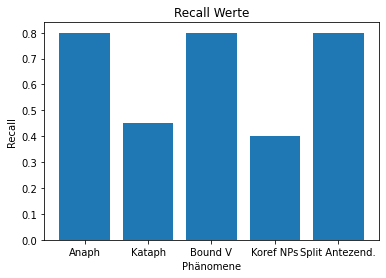

In [ ]:
# Recall
x = [0.80, 0.45, 0.80, 0.40, 0.80]
y = ["Anaph", "Kataph", "Bound V", "Koref NPs", "Split Antezend."]

print("Recall-Ergebnisse: ")
plt.bar(y, x)
plt.title("Recall Werte")
plt.xlabel("Phänomene")
plt.ylabel("Recall")
plt.show()


Precision-Ergebnisse: 


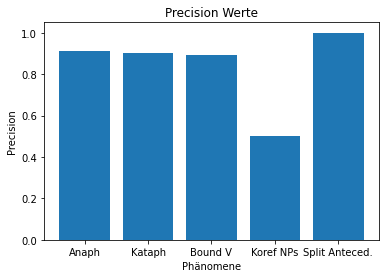

In [ ]:
# Precision
x = [0.91, 0.90, 0.89, 0.50, 1.00]
y = ["Anaph", "Kataph", "Bound V", "Koref NPs", "Split Anteced."]

print("Precision-Ergebnisse: ")
plt.bar(y, x)
plt.title("Precision Werte")
plt.xlabel("Phänomene")
plt.ylabel("Precision")
plt.show()

F-Score-Ergebnisse: 


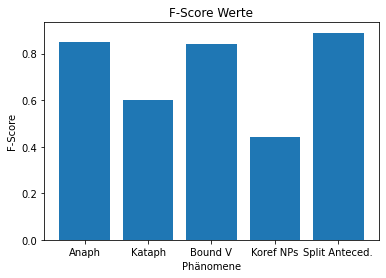

In [ ]:
# F-score
x = [0.85, 0.60, 0.84, 0.44, 0.89]
y = ["Anaph", "Kataph", "Bound V", "Koref NPs", "Split Anteced."]

print("F-Score-Ergebnisse: ")
plt.bar(y, x)
plt.title("F-Score Werte")
plt.xlabel("Phänomene")
plt.ylabel("F-Score")
plt.show()